In [41]:
import geopandas
import numpy as np
import pandas as pd

In [2]:
path = 'C:/Users/Александр/Documents/2_Экскурсоведение/Нагатинский/'

In [3]:
gdf = geopandas.read_file(path + 'Vozrast_domov_Moskvy.gpkg')

In [28]:
gdf

,r_name,r_adress,r_architect,r_style,r_photo_url,r_wikipedia,r_url,r_copyright,r_years_string,r_year_int,geometry
0,Детская поликлиника № 139 ЦАО,"Проточный переулок, дом 3-5, строение 1",None,None,None,,None,None,1961,1961.0,"MULTIPOLYGON (((4183526.757 7508848.633, 41835..."
1,Особняк XIX века,"Шубинский переулок, дом 6, строение 4",None,None,None,,None,None,1876,1876.0,"MULTIPOLYGON (((4183090.898 7508199.921, 41830..."
2,Административно-офисное здание,"1-й Смоленский переулок, дом 17А",None,None,None,,None,None,1992,1992.0,"MULTIPOLYGON (((4183334.013 7508481.281, 41833..."
3,Многоквартирный жилой дом,"2-й Вражский переулок, дом 1, корпус 1",None,None,None,,None,None,2004,2004.0,"MULTIPOLYGON (((4182701.871 7506613.889, 41826..."
4,None,None,None,None,None,,None,None,None,NaN,"MULTIPOLYGON (((4181556.561 7513047.150, 41815..."
...,...,...,...,...,...,...,...,...,...,...,...
257246,Административно-офисное здание,"Усачёва улица, дом 35, строение 3",None,None,None,,None,None,1980,1980.0,"MULTIPOLYGON (((4181244.005 7503471.215, 41812..."
257247,None,None,None,None,None,,None,None,None,NaN,"MULTIPOLYGON (((4172196.094 7464403.595, 41721..."
257248,None,"поселение Воскресенское, деревня Каракашево, д...",None,None,None,,None,None,None,NaN,"MULTIPOLYGON (((4172509.860 7464270.004, 41724..."
257249,None,None,None,None,None,,None,None,None,NaN,"MULTIPOLYGON (((4172744.588 7464390.792, 41727..."


In [4]:
gdf_nn = gdf[gdf['r_adress'].notnull()]

In [58]:
gdf_nn['r_name'].unique()

array(['Детская поликлиника № 139 ЦАО', 'Особняк XIX века',
       'Административно-офисное здание', ...,
       'Жилой комплекс «Арбат Тауэр»',
       'Школьное отделение Романовской школы',
       'Московская городская лингвистическая гимназия № 1513'],
      dtype=object)

In [120]:
# Эти улицы целиком в районе
gdf_nn_s = gdf_nn[gdf_nn['r_adress'].str.contains("Судостроительная улица")]
gdf_nn_r = gdf_nn[gdf_nn['r_adress'].str.contains("улица Речников")]
gdf_nn_ya = gdf_nn[gdf_nn['r_adress'].str.contains("Якорная улица")]
gdf_nn_z = gdf_nn[gdf_nn['r_adress'].str.contains("Затонная улица")]
gdf_nn_kb = gdf_nn[gdf_nn['r_adress'].str.contains("Кленовый бульвар")]
gdf_nn_n = gdf_nn[gdf_nn['r_adress'].str.contains("улица Новинки")]
gdf_nn_ku = gdf_nn[gdf_nn['r_adress'].str.contains("Коломенская улица")]
gdf_nn_kn = gdf_nn[gdf_nn['r_adress'].str.contains("Коломенская набережная")]
gdf_nn_kr = gdf_nn[gdf_nn['r_adress'].str.contains("Корабельная улица")]

In [149]:
# Эти улицы выходят за границы района
gdf_nn_nn = gdf_nn[gdf_nn['r_adress'].str.contains("Нагатинская набережная")]
gdf_nn_nn_nz = gdf_nn_nn.cx[4193034.805 : , : ]

gdf_nn_a = gdf_nn[gdf_nn['r_adress'].str.contains("проспект Андропова")]
gdf_nn_a_nz = gdf_nn_a.cx[4192800:4194000, 7493400:7495882]

gdf_nn_shlz = gdf_nn[gdf_nn['r_adress'].str.contains("Гурьянова")].cx[:4196881, :]

In [150]:
nag_zaton = pd.concat([gdf_nn_s, gdf_nn_r, gdf_nn_ya, gdf_nn_z, gdf_nn_kb, gdf_nn_n, gdf_nn_ku, gdf_nn_kn, gdf_nn_kr,
                      gdf_nn_nn_nz, gdf_nn_a_nz, gdf_nn_shlz])

In [151]:
c1 = nag_zaton['r_year_int'] < 1960
c2 = nag_zaton['r_year_int'] >= 1960

In [152]:
c = [c1, c2]
v = ['до включения в мск','после включения в мск']

In [153]:
nag_zaton['year_group'] = np.select(c, v, default='после включения в мск')

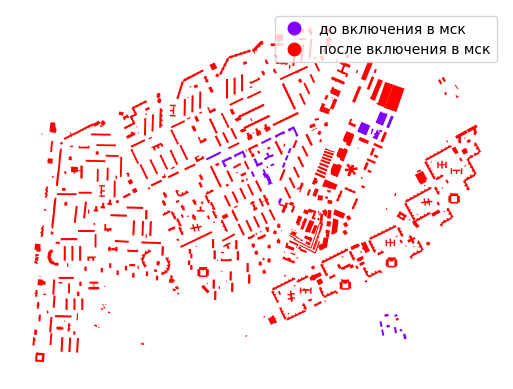

In [158]:
nag_zaton.plot(column='year_group', legend=True, cmap="rainbow").set_axis_off()

In [157]:
nag_zaton.explore(column="year_group", 
                 tiles="CartoDB positron",
                 cmap="rainbow")

In [146]:
gdf_nn[gdf_nn['r_adress'].str.contains("Гурьянова")].cx[:4196881, :].explore()

In [145]:
gdf_nn[gdf_nn['r_adress'].str.contains("Гурьянова, дом 87")]

,r_name,r_adress,r_architect,r_style,r_photo_url,r_wikipedia,r_url,r_copyright,r_years_string,r_year_int,geometry
117393,None,"улица Гурьянова, дом 87, корпус 1",None,None,http://photos.wikimapia.org/p/00/05/03/83/61_f...,,None,"фото: Seversky, Wikimapia",1936,1936.0,"MULTIPOLYGON (((4196881.542 7493622.881, 41968..."
117508,Многоквартирный жилой дом,"улица Гурьянова, дом 87, корпус 4",None,None,http://photos.wikimapia.org/p/00/05/03/83/08_f...,,None,"фото: Seversky, Wikimapia",1959,1959.0,"MULTIPOLYGON (((4196632.520 7493760.233, 41966..."
117567,Административно-офисное здание,"улица Гурьянова, дом 87, строение 6",None,None,http://photos.wikimapia.org/p/00/05/03/83/44_f...,,None,"фото: Seversky, Wikimapia",1937,1937.0,"MULTIPOLYGON (((4196708.490 7493764.980, 41967..."
117588,Заброшенный продуктовый магазин,"улица Гурьянова, дом 87, строение 5",None,None,http://photos.wikimapia.org/p/00/07/15/37/13_f...,,None,"фото: VOVLAN80, Wikimapia",1937,1937.0,"MULTIPOLYGON (((4196829.071 7493735.127, 41968..."
117589,Административно-офисное здание,"улица Гурьянова, дом 87, строение 6",None,None,http://photos.wikimapia.org/p/00/05/03/83/44_f...,,None,"фото: Seversky, Wikimapia",1937,1937.0,"MULTIPOLYGON (((4196708.041 7493781.028, 41967..."
118236,Многоквартирный жилой дом,"улица Гурьянова, дом 87, корпус 2",None,None,http://photos.wikimapia.org/p/00/02/83/18/19_f...,,None,"фото: ni666ck, Wikimapia",1940,1940.0,"MULTIPOLYGON (((4196792.319 7493690.871, 41967..."
164902,Многоквартирный жилой дом,"улица Гурьянова, дом 87, корпус 3",None,None,None,,None,None,1955,1955.0,"MULTIPOLYGON (((4196651.563 7493662.907, 41966..."
164903,None,"улица Гурьянова, дом 87, строение 8",None,None,None,,None,None,1937,1937.0,"MULTIPOLYGON (((4196790.440 7493898.719, 41967..."
166513,None,"улица Гурьянова, дом 87, строение 7",None,None,None,,None,None,1937,1937.0,"MULTIPOLYGON (((4196699.821 7493876.232, 41966..."
182402,None,"улица Гурьянова, дом 87, строение 9",None,None,None,,None,None,None,NaN,"MULTIPOLYGON (((4196811.160 7493832.484, 41967..."
